In [1]:
import argparse

import torch

from PIL import Image

from strhub.data.module import SceneTextDataModule
from strhub.models.utils import load_from_checkpoint, parse_model_args

In [19]:
checkpoint = '/home/nader/parseq/model/outputs/parseq-tiny/2023-07-07_18-38-51/checkpoints/best.ckpt'
model = load_from_checkpoint(checkpoint).eval().to('cuda')
img_transform = SceneTextDataModule.get_transform(model.hparams.img_size)
model.refine_iters = 0
model.decode_ar = False

In [4]:
model.hparams.img_size

[32, 128]

In [6]:
dummy_input = torch.rand(1, 3, *model.hparams.img_size)  # (1, 3, 32, 128) by default

# Convert to TorchScript
torch_jit = model.to_torchscript(file_path='torchscript_model.pt', method='trace', example_inputs=dummy_input)


/home/nader/miniconda3/envs/torch/lib/python3.7/site-packages/torch/__init__.py:772: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert condition, message
/home/nader/vit_analysis/timm_vit_modified/pytorch-image-models/timm/models/vision_transformer.py:201: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)


RecursiveScriptModule(
  original_name=PARSeq
  (encoder): RecursiveScriptModule(
    original_name=Encoder
    (patch_embed): RecursiveScriptModule(
      original_name=PatchEmbed
      (proj): RecursiveScriptModule(original_name=Conv2d)
      (norm): RecursiveScriptModule(original_name=Identity)
    )
    (pos_drop): RecursiveScriptModule(original_name=Dropout)
    (blocks): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(
        original_name=Block
        (norm1): RecursiveScriptModule(original_name=LayerNorm)
        (attn): RecursiveScriptModule(
          original_name=Attention
          (qkv): RecursiveScriptModule(original_name=Linear)
          (attn_drop): RecursiveScriptModule(original_name=Dropout)
          (proj): RecursiveScriptModule(original_name=Linear)
          (proj_drop): RecursiveScriptModule(original_name=Dropout)
        )
        (ls1): RecursiveScriptModule(original_name=Identity)
        (drop_path1): RecursiveScript

In [10]:
dummy_input = torch.rand(1, 3, *model.hparams.img_size)
model.refine_iters = 0
model.decode_ar = False
model.to_onnx('parseq_fast.onnx', dummy_input, opset_version=14)

/home/nader/miniconda3/envs/torch/lib/python3.7/site-packages/torch/__init__.py:772: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert condition, message
/home/nader/vit_analysis/timm_vit_modified/pytorch-image-models/timm/models/vision_transformer.py:201: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
/home/nader/miniconda3/envs/torch/lib/python3.

In [9]:
model.hparams

"batch_size":       400
"charset_test":     0123456789
"charset_train":    0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
"dec_depth":        1
"dec_mlp_ratio":    4
"dec_num_heads":    6
"decode_ar":        True
"dropout":          0.1
"embed_dim":        192
"enc_depth":        12
"enc_mlp_ratio":    4
"enc_num_heads":    3
"img_size":         [32, 128]
"lr":               0.0007
"max_label_length": 25
"name":             parseq-tiny
"patch_size":       [4, 8]
"perm_forward":     True
"perm_mirrored":    True
"perm_num":         6
"refine_iters":     1
"warmup_pct":       0.075
"weight_decay":     0.0

In [59]:
model.refine_iters = 0
model.decode_ar = False
model = model.to(device).eval()
onn
model.to_onnx(onnx_path, img, do_constant_folding=True, opset_version=14)  # opset v14 or newer is required

# check
onnx_model = onnx.load(onnx_path)
onnx.checker.check_model(onnx_model, full_check=True)

NameError: name 'onnx_path' is not defined

In [53]:
image.shape

torch.Size([1, 3, 64, 64])

In [14]:
import onnxruntime as ort
import cv2
ort_sess = ort.InferenceSession('parseq_fast.onnx', providers=['CUDAExecutionProvider'])
input_tensor = ort_sess.get_inputs()[0]


#image = cv2.imread("/home/nader/Sport_NHL/images/05140.jpg")
#image =  Image.fromarray(image).convert("RGB")
image = image.cpu().numpy()

print(input_tensor.name)
outputs = ort_sess.run(None, {input_tensor.name: image})
print(outputs)

input.1
[array([[[ 1.9195061,  4.0674033,  7.059618 , ..., -6.070568 ,
         -5.9363885, -4.665075 ],
        [ 7.908867 ,  3.8088396,  5.276347 , ..., -5.9306955,
         -7.5195117, -4.619533 ],
        [10.955156 ,  2.3214612,  3.407185 , ..., -6.2946415,
         -8.81953  , -7.0905643],
        ...,
        [ 9.621109 ,  4.7555614,  5.731353 , ..., -5.21416  ,
         -6.0096073, -5.5737042],
        [ 9.579743 ,  4.269778 ,  5.2627254, ..., -4.9893484,
         -6.169361 , -5.2445216],
        [12.714642 ,  2.2933834,  3.0968468, ..., -3.7622654,
         -5.74861  , -1.880696 ]]], dtype=float32)]


2023-07-10 00:32:26.310901311 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:541 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/reference/execution-providers/CUDA-ExecutionProvider.html#requirements to ensure all dependencies are met.


In [21]:
model(image)

tensor([[[  4.7381,   2.6083,   3.5715,  ...,  -4.4862,  -2.9583,  -2.2116],
         [  5.6117,   2.1978,  -0.6833,  ...,  -5.2718, -10.9367, -10.6475],
         [ 17.8946,   4.6776,   2.6524,  ...,  -2.2964,  -8.8940,  -8.2940],
         ...,
         [ 14.9897,   5.1986,   0.5952,  ...,  -2.7985,  -7.8577,  -9.4082],
         [ 15.0633,   3.7193,   0.2575,  ...,  -2.4745,  -6.6265,  -8.1996],
         [ 17.0206,   1.7401,  -0.0262,  ...,  -1.8924,  -4.0002,  -4.5276]]],
       device='cuda:0', grad_fn=<AddBackward0>)

In [40]:
from scipy.special import softmax
m = softmax(outputs[0], axis=-1)

In [13]:
img_transform

Compose(
    Resize(size=[32, 128], interpolation=bicubic, max_size=None, antialias=None)
    ToTensor()
    Normalize(mean=0.5, std=0.5)
)

In [9]:
from glob import glob
device = 'cuda'
images = glob('/home/nader/Sport_NHL/*.jpg')

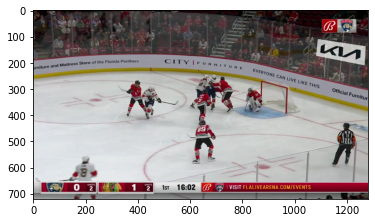

/home/nader/Sport_NHL/t.jpg: 7


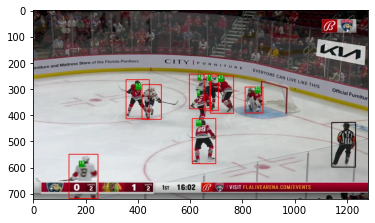

/home/nader/Sport_NHL/sd.jpg: 7


In [20]:
from matplotlib import pyplot as plt
for fname in images:
    image = Image.open(fname).convert('RGB')
    plt.imshow(image)
    plt.show()
    image = img_transform(image).unsqueeze(0).to(device)
    p = model(image).softmax(-1)
    pred, p = model.tokenizer.decode(p)
    print(f'{fname}: {pred[0]}')

In [21]:
model(image)

tensor([[[ 1.9195,  4.0674,  7.0596,  ..., -6.0706, -5.9364, -4.6651],
         [ 7.9089,  3.8088,  5.2763,  ..., -5.9307, -7.5195, -4.6195],
         [10.9552,  2.3215,  3.4072,  ..., -6.2946, -8.8195, -7.0906],
         ...,
         [ 9.6211,  4.7556,  5.7314,  ..., -5.2142, -6.0096, -5.5737],
         [ 9.5797,  4.2698,  5.2627,  ..., -4.9893, -6.1694, -5.2445],
         [12.7146,  2.2934,  3.0969,  ..., -3.7623, -5.7486, -1.8807]]],
       device='cuda:0', grad_fn=<AddBackward0>)

In [22]:
model = torch.jit.load('torchscript_model.pt')
model.eval()

RecursiveScriptModule(
  original_name=PARSeq
  (encoder): RecursiveScriptModule(
    original_name=Encoder
    (patch_embed): RecursiveScriptModule(
      original_name=PatchEmbed
      (proj): RecursiveScriptModule(original_name=Conv2d)
      (norm): RecursiveScriptModule(original_name=Identity)
    )
    (pos_drop): RecursiveScriptModule(original_name=Dropout)
    (blocks): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(
        original_name=Block
        (norm1): RecursiveScriptModule(original_name=LayerNorm)
        (attn): RecursiveScriptModule(
          original_name=Attention
          (qkv): RecursiveScriptModule(original_name=Linear)
          (attn_drop): RecursiveScriptModule(original_name=Dropout)
          (proj): RecursiveScriptModule(original_name=Linear)
          (proj_drop): RecursiveScriptModule(original_name=Dropout)
        )
        (ls1): RecursiveScriptModule(original_name=Identity)
        (drop_path1): RecursiveScript

In [24]:
model(image)

tensor([[[ 1.9195,  4.0674,  7.0596,  ..., -6.0706, -5.9364, -4.6651],
         [ 7.9089,  3.8088,  5.2763,  ..., -5.9307, -7.5195, -4.6195],
         [10.9552,  2.3215,  3.4072,  ..., -6.2946, -8.8195, -7.0906],
         ...,
         [ 9.6211,  4.7556,  5.7314,  ..., -5.2142, -6.0096, -5.5737],
         [ 9.5797,  4.2698,  5.2627,  ..., -4.9893, -6.1694, -5.2445],
         [12.7146,  2.2934,  3.0969,  ..., -3.7623, -5.7486, -1.8807]]],
       device='cuda:0', grad_fn=<AddBackward0>)